# Model creation and training

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
data=pd.read_csv('archive/train_norm.csv',index_col=0)
#data=pd.read_csv('archive/train_cleaned.csv',index_col=0)

In [3]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0.0,0,0,0.052632,0.006533,1,1,0.519154,0.725671,55.0
1,0.5,0,0,0.052632,0.006406,1,1,0.512032,0.722201,51.0
2,0.0,0,0,0.052632,0.004685,1,1,0.517189,0.725796,43.0
3,0.0,0,1,0.052632,0.004668,1,1,0.679690,0.724748,62.5
4,0.5,1,0,0.052632,0.005016,0,1,0.617717,0.765300,60.5


In [4]:
y=data['TARGET(PRICE_IN_LACS)']
X=data.drop(['TARGET(PRICE_IN_LACS)'],axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
score_dict={}
score_dict_test={}
def score_dict_add(score_dict,model,mse,mae,r2,y_pred):
    score_dict[model]={"R2 Score":r2,
                       "Mean Squared Error": mse,
                       "Mean Absolute Error": mae,
                       "y_pred":y_pred}
    return score_dict

## Random Forest Regressor

In [7]:
# Creating the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Random Forest Regression",mse,mae,r2,y_pred)

## XGB Regressor

In [8]:
# Creating the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Training the model
xgb_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"XGBoost Regression",mse,mae,r2,y_pred)


## Support Vector Regression

In [9]:
# Creating the SVR model
svr_regressor = SVR()

# Training the model
svr_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Support Vector Regression",mse,mae,r2,y_pred)

## Linear Regression

In [10]:
# Creating the Linear Regression model
linear_regressor = LinearRegression()

# Training the model
linear_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Linear Regression",mse,mae,r2,y_pred)

## Ridge Regression

In [11]:
# Creating the Ridge Regression model
ridge_regressor = Ridge(alpha=0.5)

# Training the model
ridge_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ridge_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Ridge Regression",mse,mae,r2,y_pred)

## KNN Regressor

In [12]:
# Creating the KNN regressor
k = 5  # Number of neighbors to consider
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Training the model
knn_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"KNN Regression",mse,mae,r2,y_pred)

# Auto ML - Hyperparameter tuning

## Random Forest Regressor

In [ ]:
# Create the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameters and their ranges to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(rf_regressor, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)  # X and y are your training data and labels

In [ ]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)  # X and y are your training data and labels

# Save the best model to a file
joblib.dump(best_model, 'models/RFR.pkl')

## MLP Regressor

In [ ]:
# Create the MLPRegressor model
model = MLPRegressor(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(np.random.randint(64, 100),), 
                           (np.random.randint(64, 100),np.random.randint(64, 100)), 
                           (np.random.randint(64, 100),np.random.randint(64, 100),np.random.randint(64, 100))],
    'learning_rate':['constant', 'adaptive'],
    'max_iter': [1000],
    'batch_size': [512]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters and model
best_params_nn = grid_search.best_params_
best_model_nn = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model_nn.fit(X_train, y_train)  # X and y are your training data and labels

# Save the best model to a file
joblib.dump(best_model_nn, 'models/NN.pkl')

## Make Prediction

In [13]:
# Make predictions on the test data
RFR = joblib.load('models/RFR.pkl')
y_pred = RFR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"RFR_hyperparam",mse,mae,r2,y_pred)

In [14]:
# Make predictions on the test data
NN = joblib.load('models/NN.pkl')
y_pred = NN.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"MLPRegressor",mse,mae,r2,y_pred)

# Results

In [15]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('Mean Absolute Error')
score_pd.to_csv('results/results.csv')

In [16]:
score_pd.iloc[:,0:3]

,R2 Score,Mean Squared Error,Mean Absolute Error
Random Forest Regression,0.949126,17839.053991,30.345663
XGBoost Regression,0.951387,17046.089796,32.419406
KNN Regression,0.916912,29134.820627,39.328192
RFR_hyperparam,0.889327,38807.24669,63.272248
MLPRegressor,0.90234,34244.194813,64.116347
Linear Regression,0.751762,87044.186462,77.9829
Ridge Regression,0.750092,87629.841341,78.483115
Support Vector Regression,-0.004747,352313.493172,95.551704


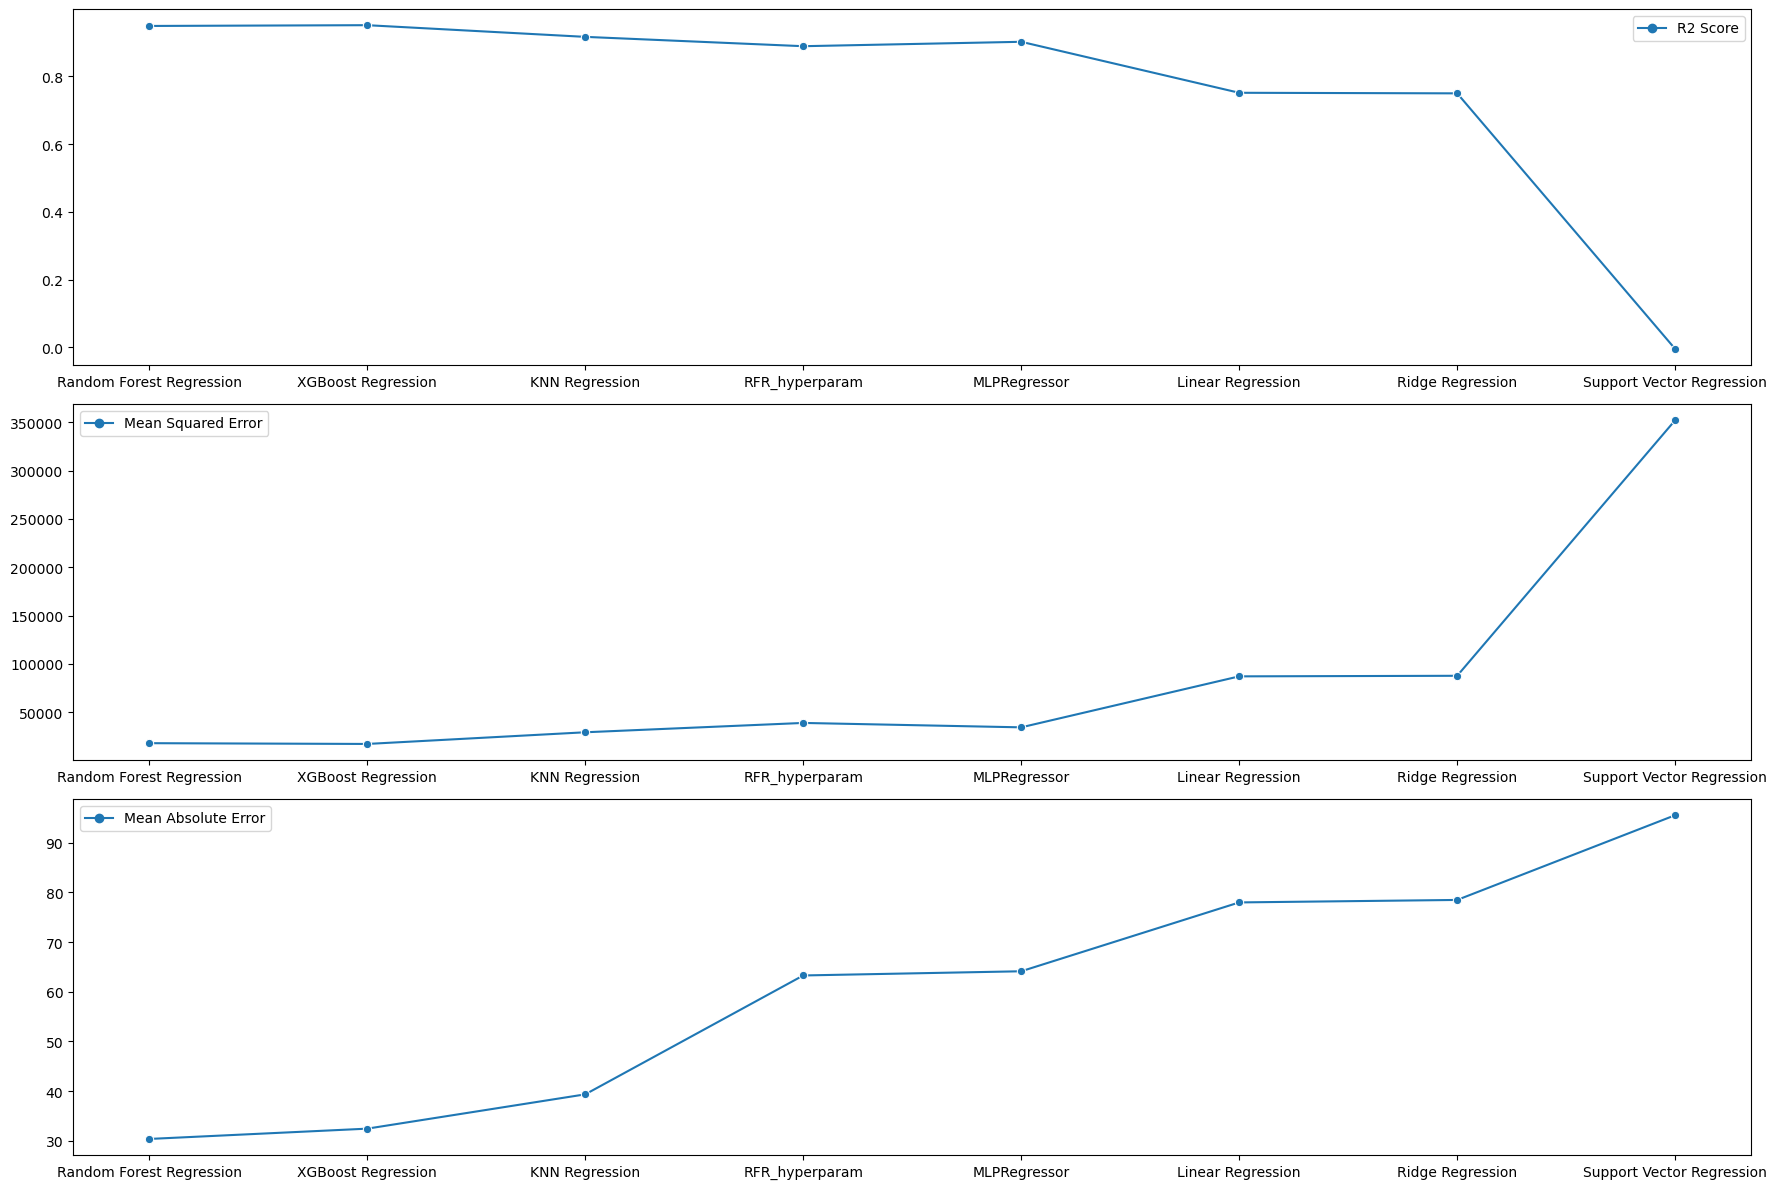

In [17]:
import seaborn as sns 
from matplotlib import pyplot as plt

fig,ax=plt.subplots(3,1,figsize=(18,12))
sns.lineplot(data=score_pd.iloc[:,[0]],markers=True,ax=ax[0])
sns.lineplot(data=score_pd.iloc[:,[2]],markers=True,ax=ax[2])
sns.lineplot(data=score_pd.iloc[:,[1]],markers=True,ax=ax[1])
plt.tight_layout()
plt.show()

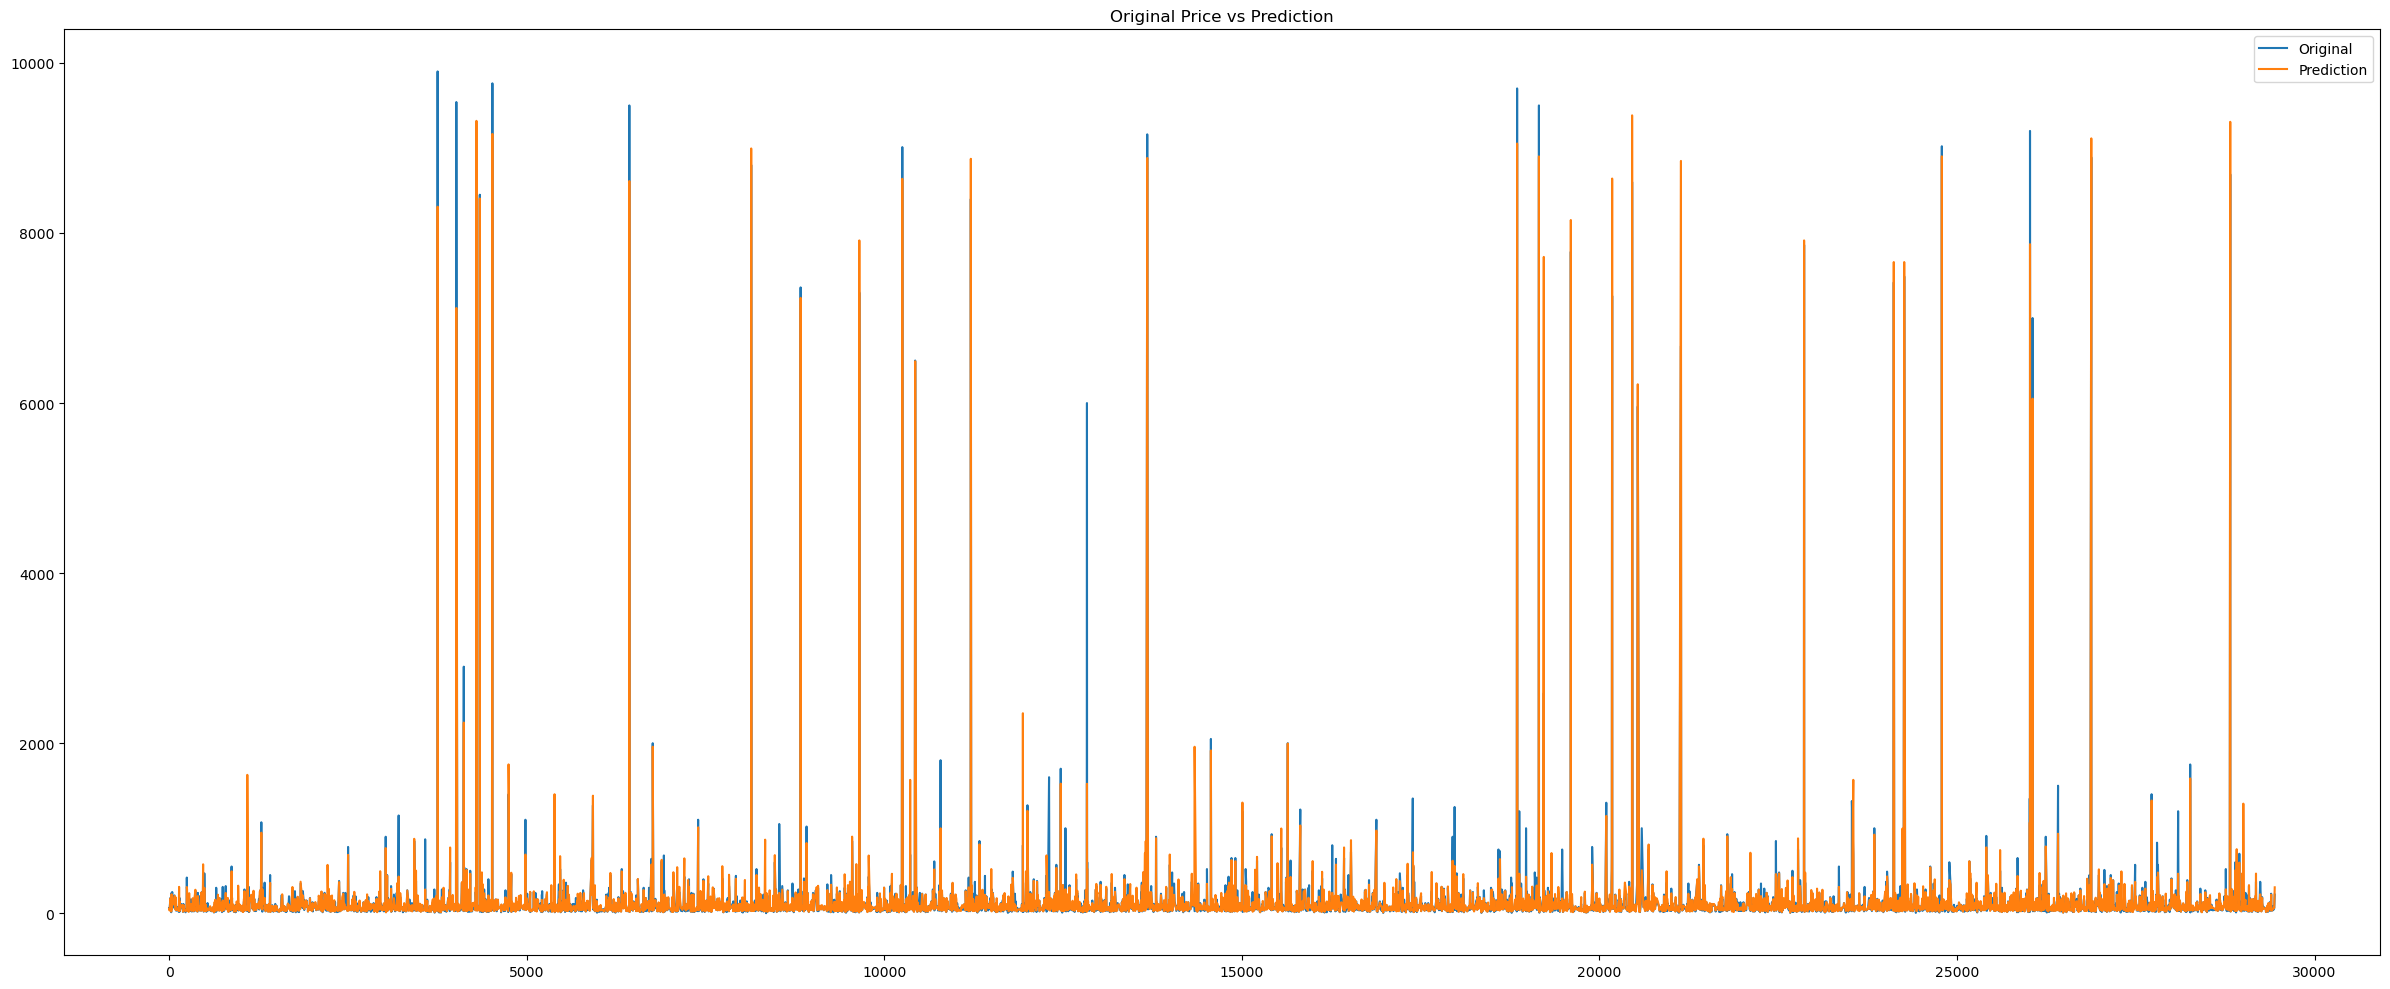

In [18]:
y_pred=score_dict['Random Forest Regression']['y_pred']

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(24, 10))

# Plot the original prices and predictions
sns.lineplot(y=y_test.values.ravel(), x=y_test.index, legend=False, ax=ax)
sns.lineplot(y=y_pred, x=y_test.index, legend=False, ax=ax)

# Set the title and legend
ax.set_title('Original Price vs Prediction')
ax.legend(['Original', 'Prediction'])

# Display the plot
plt.tight_layout()
plt.show()


In [19]:
test_data=pd.read_csv('archive/test_norm.csv',index_col=0)

In [20]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0.0,0,0,0.000000,0.002731,1,1,0.604092,0.709108
1,0.5,1,1,0.052632,0.004014,0,0,0.580575,0.709474
2,0.5,0,0,0.052632,0.006316,1,1,0.617717,0.765300
3,0.5,0,0,0.105263,0.007037,1,1,0.662747,0.718342
4,0.0,0,0,0.000000,0.002153,1,1,0.618822,0.708461


In [21]:
y_pred = np.zeros((8, test_data.shape[0]))
y_pred[0,:] = rf_regressor.predict(test_data)
y_pred[1,:] = xgb_regressor.predict(test_data)
y_pred[2,:] = svr_regressor.predict(test_data)
y_pred[3,:] = linear_regressor.predict(test_data)
y_pred[4,:] = ridge_regressor.predict(test_data)
y_pred[5,:] = knn_regressor.predict(test_data)
y_pred[6,:] = RFR.predict(test_data)
y_pred[7,:] = NN.predict(test_data)

In [22]:
y_pred_mean = np.mean(y_pred, axis=0)

In [23]:
names=['Random Forest Regression','XGBoost Regression','Support Vector Regression','Linear Regression',
       'Ridge Regression','KNN Regression','RFR_hyperparam','MLPRegressor']
for i in range(8):
    mse = mean_squared_error(y_pred[i,:], y_pred_mean)
    mae = mean_absolute_error(y_pred[i,:], y_pred_mean)
    r2 = r2_score(y_pred[i,:], y_pred_mean)
    
    score_dict_test=score_dict_add(score_dict_test,names[i],mse,mae,r2,y_pred)

In [24]:
score_pd_test=pd.DataFrame(score_dict_test).transpose().sort_values('Mean Absolute Error')
score_pd_test.to_csv('results/test_results.csv')

In [25]:
score_pd_test.iloc[:,0:3]

,R2 Score,Mean Squared Error,Mean Absolute Error
RFR_hyperparam,0.964461,8175.824354,36.476282
XGBoost Regression,0.914883,26948.766419,36.595776
Random Forest Regression,0.921581,24801.420385,38.163559
KNN Regression,0.914965,26067.326034,39.030137
Linear Regression,0.823946,47018.801349,43.01013
Ridge Regression,0.825131,45235.771043,43.266692
MLPRegressor,0.938632,18442.829129,43.970655
Support Vector Regression,-512.119314,200650.469354,64.839515


In [26]:
np.save('results/y_pred.npy', y_pred)
np.save('results/y_pred_mean.npy', y_pred_mean)

# Monitoring

In [27]:
y_pred = np.load('results/y_pred.npy')
y_pred_mean = np.load('results/y_pred_mean.npy')

In [28]:
mse_list=[]
mae_list=[]
r2_list=[]
y_pred_list=[]
for k in range(8):
    mse=[]
    mae=[]
    r2=[]
    y_predd=[]
    for i in range(0,68720,1718):
        mse.append(mean_squared_error(y_pred[k,i:i+1717], y_pred_mean[i:i+1717]))
        mae.append(mean_absolute_error(y_pred[k,i:i+1717], y_pred_mean[i:i+1717]))
        r2.append(r2_score(y_pred[k,i:i+1717], y_pred_mean[i:i+1717]))
        y_predd.append(y_pred[k,i:i+1717].mean())
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    y_pred_list.append(y_predd)


## Mean Output Value - Time

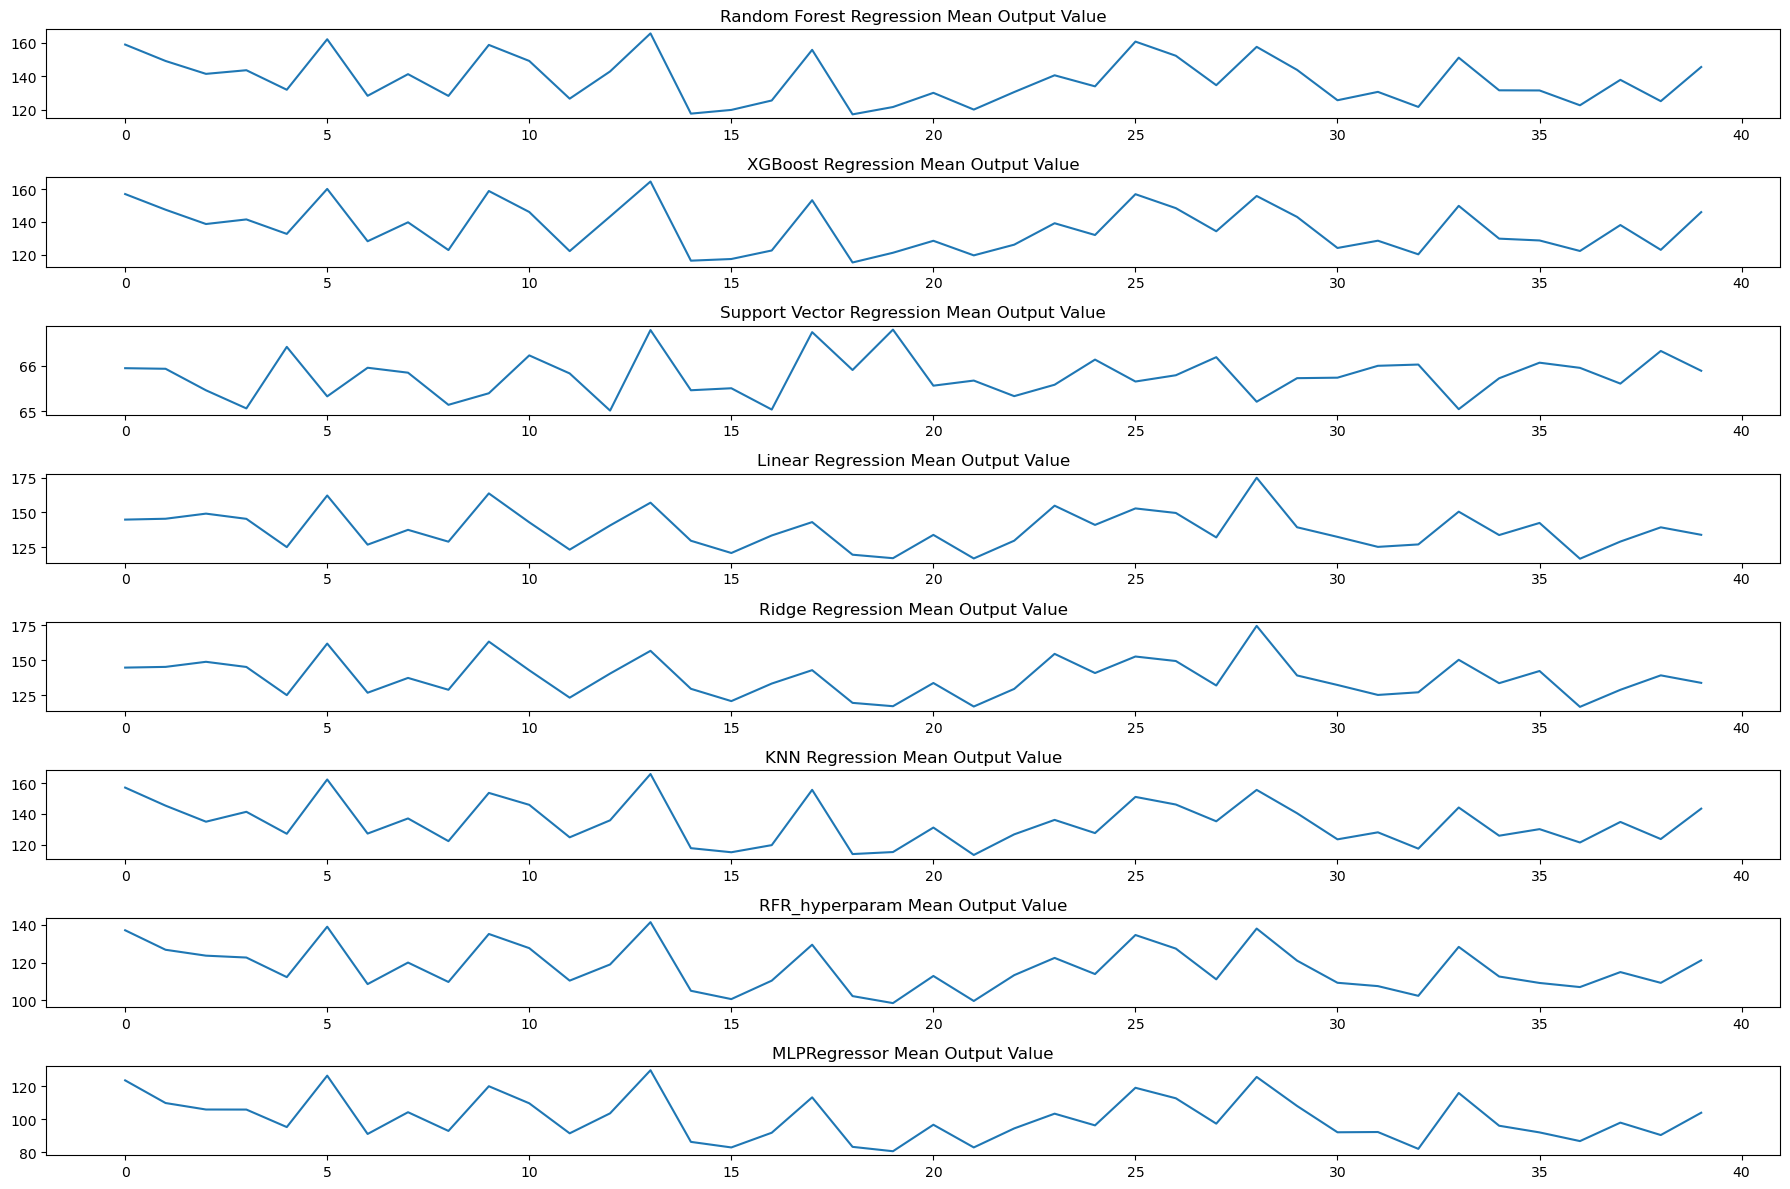

In [29]:
fig, ax = plt.subplots(8, 1, figsize=(18, 12))
for i in range(8):
    sns.lineplot(data=y_pred_list[i], markers=True, ax=ax[i])
    ax[i].set_title(names[i]+ ' Mean Output Value') 
    plt.tight_layout()

plt.show()

## Mean Squared Error - Time

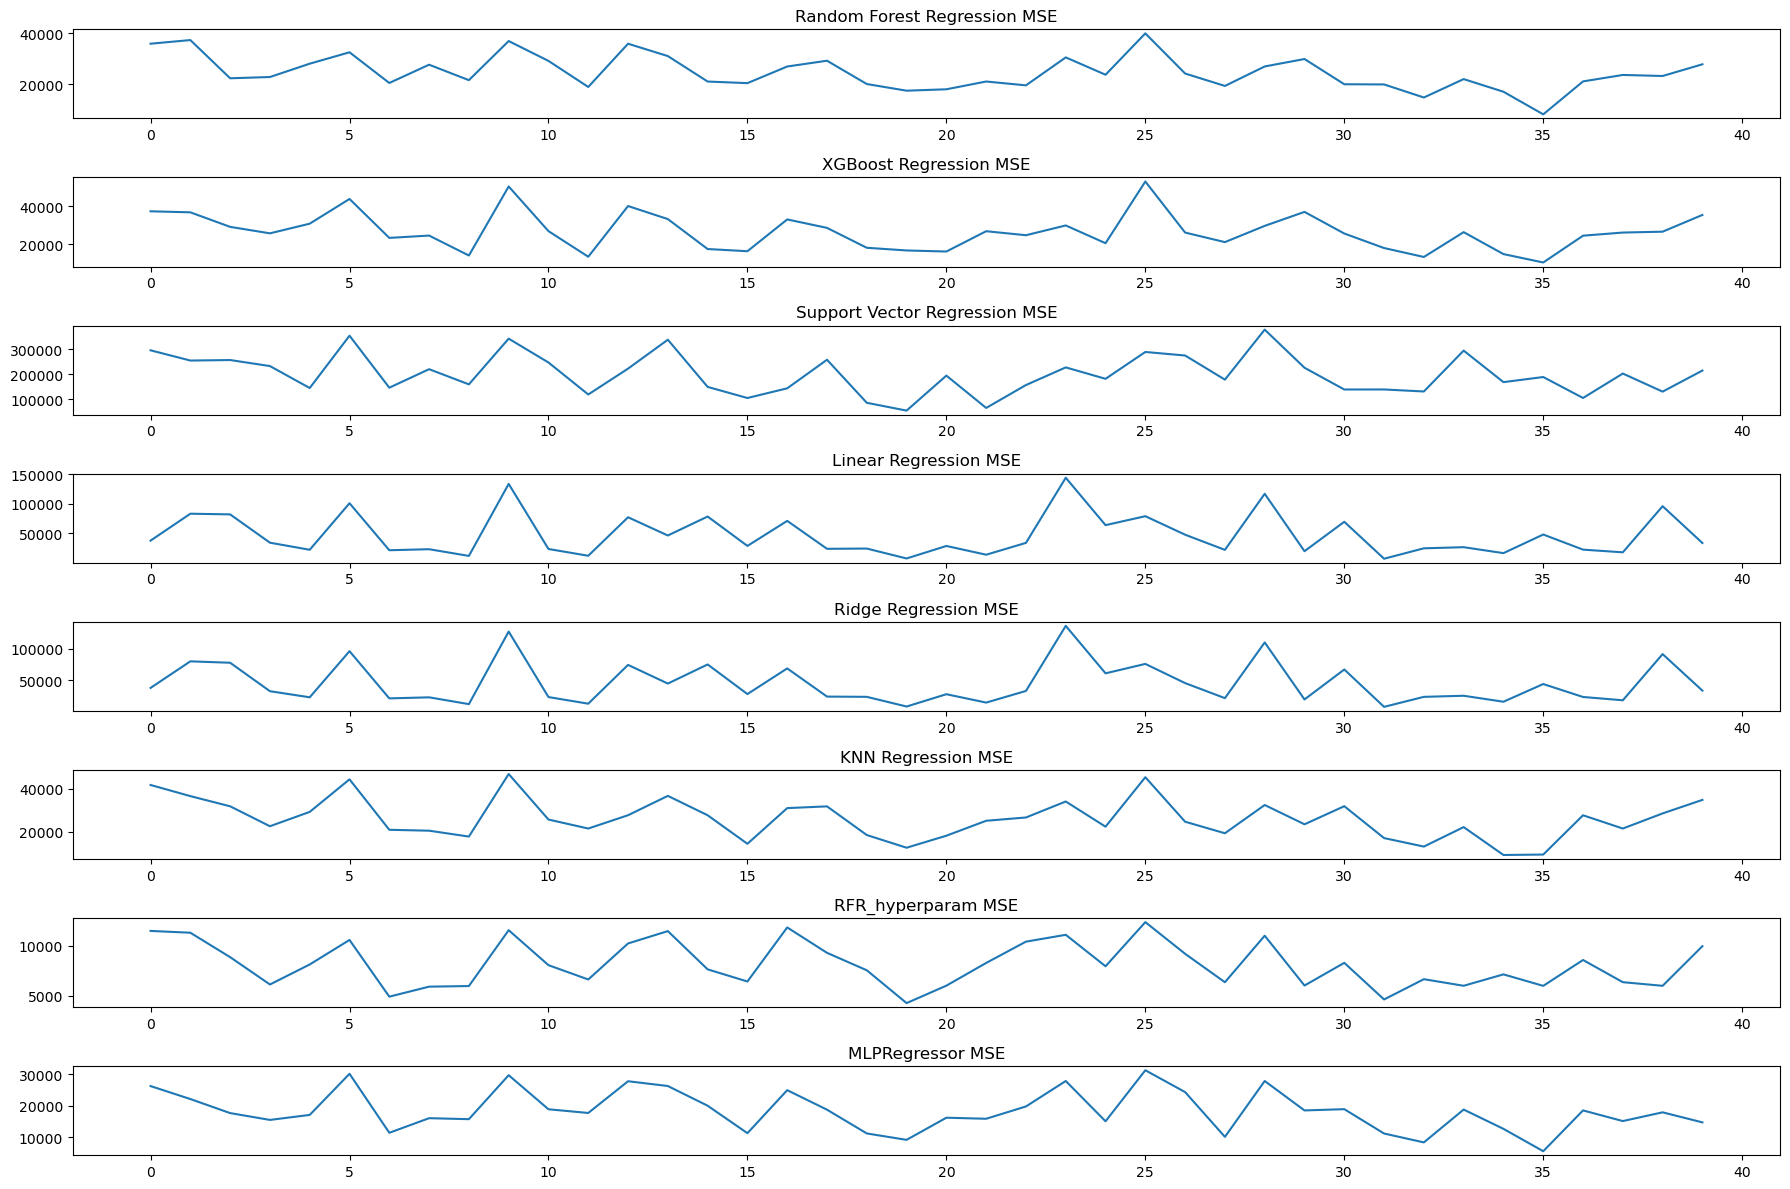

In [30]:
fig, ax = plt.subplots(8, 1, figsize=(18, 12))
for i in range(8):
    sns.lineplot(data=mse_list[i], markers=True, ax=ax[i])
    ax[i].set_title(names[i]+ ' MSE')  
    plt.tight_layout()

plt.show()


## Mean Absolute Error - Time

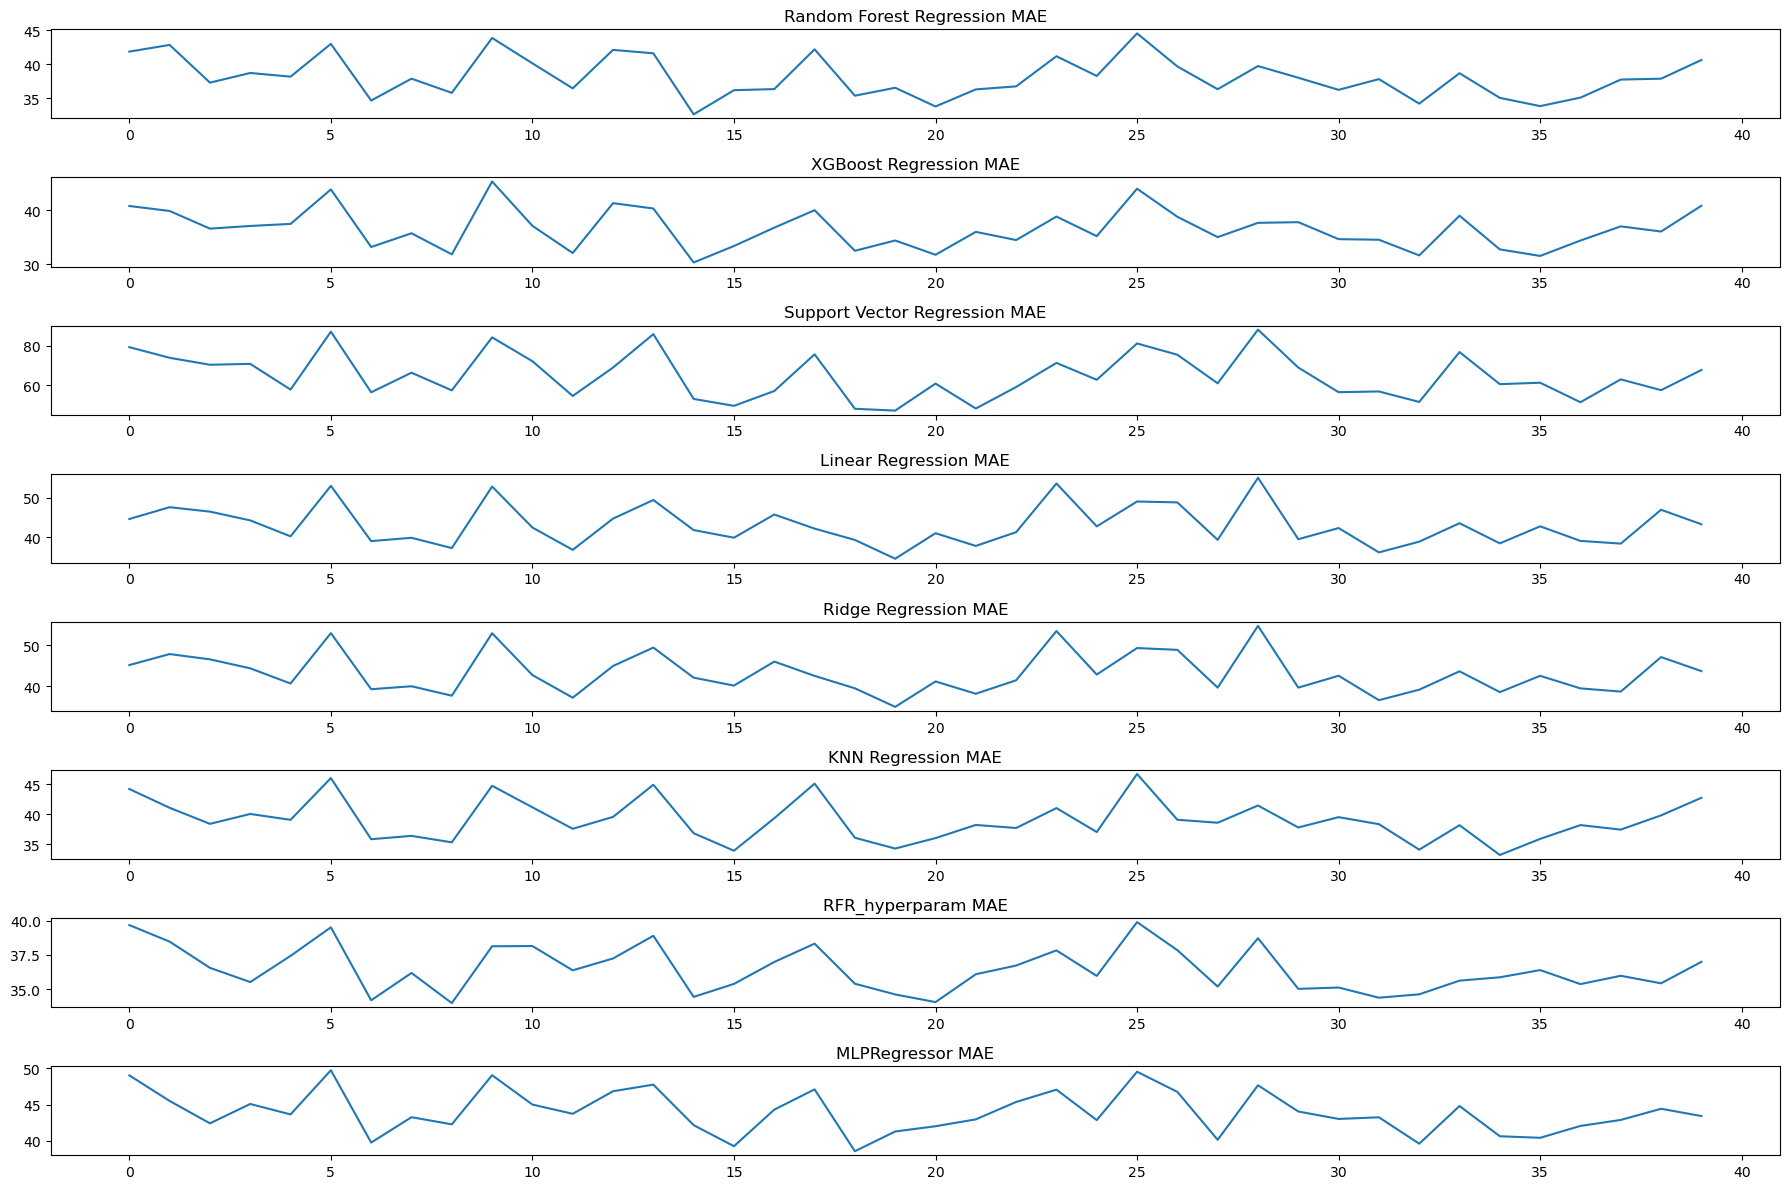

In [31]:
fig, ax = plt.subplots(8, 1, figsize=(18, 12))
for i in range(8):
    sns.lineplot(data=mae_list[i], markers=True, ax=ax[i])
    ax[i].set_title(names[i]+ ' MAE')  
    plt.tight_layout()

plt.show()


## R2 Score - Time

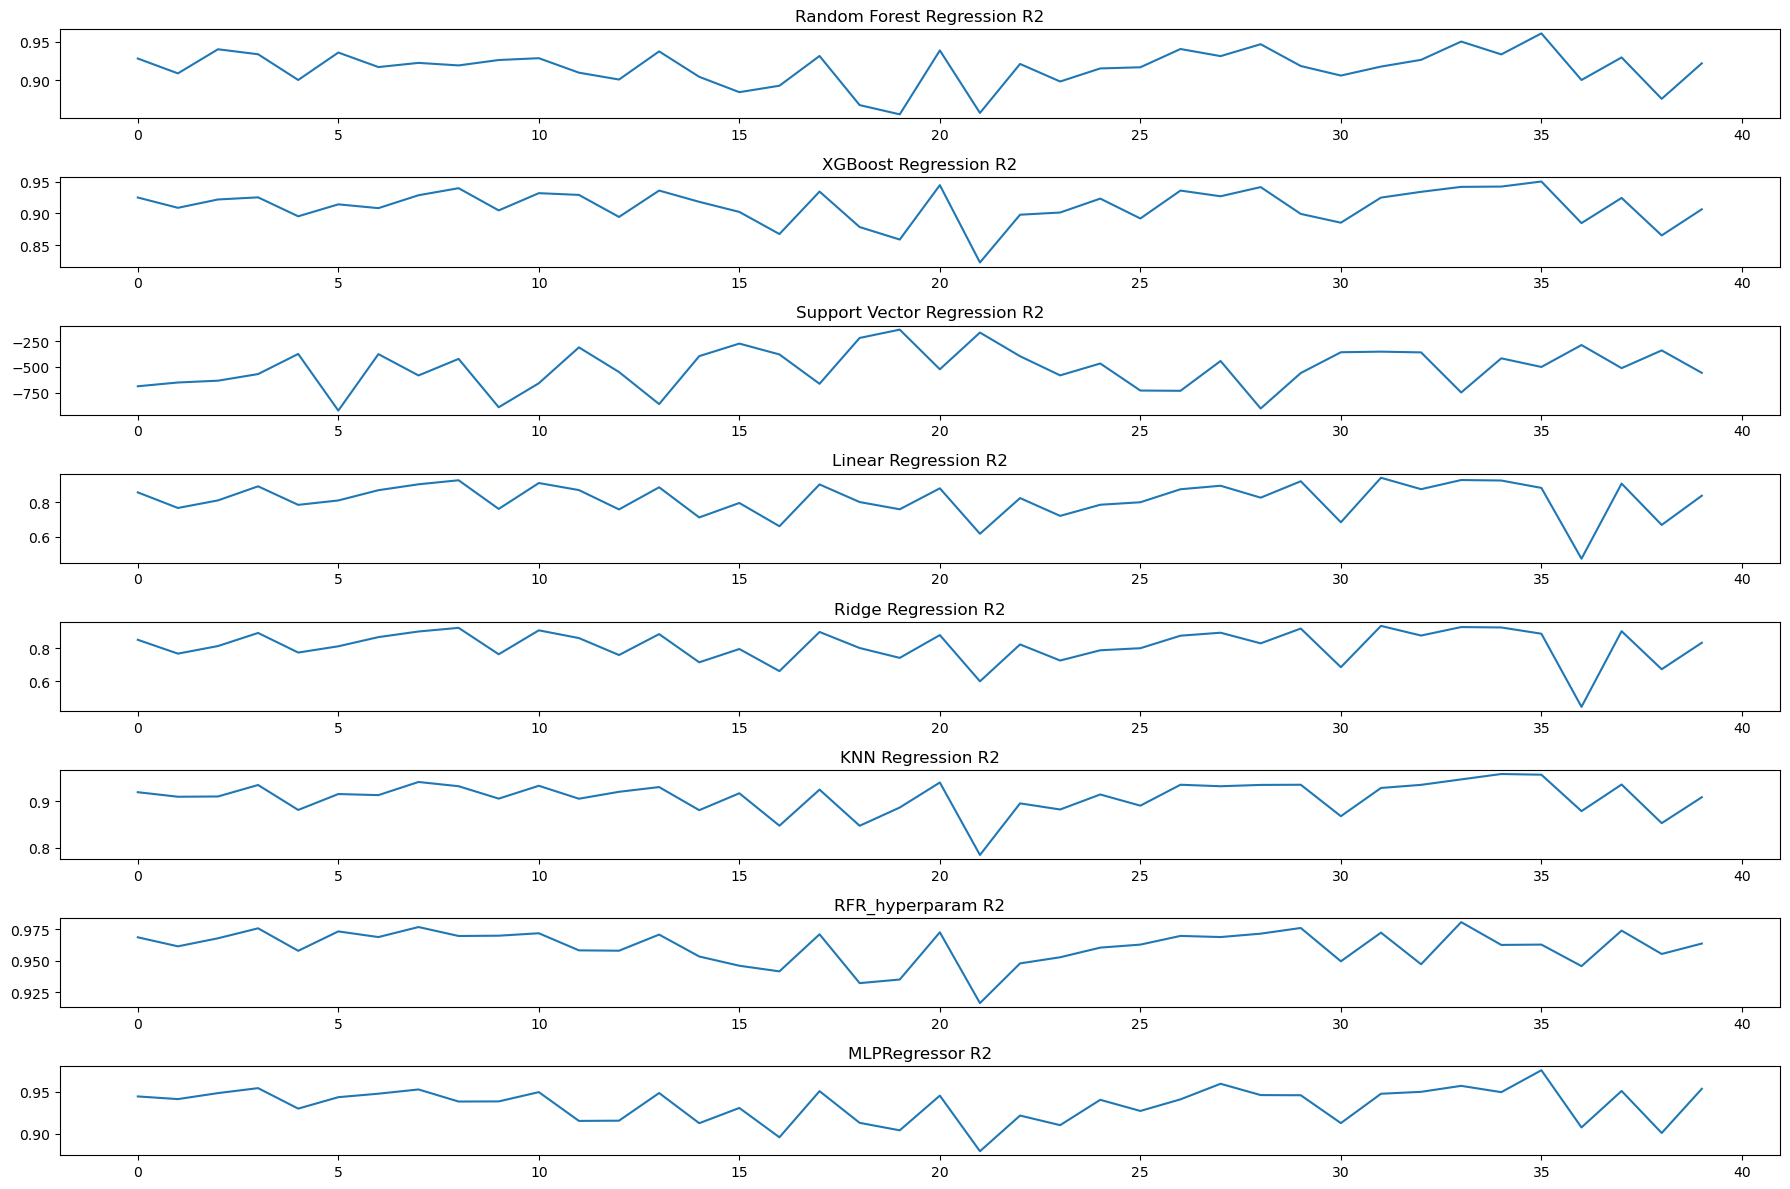

In [32]:
fig, ax = plt.subplots(8, 1, figsize=(18, 12))
for i in range(8):
    sns.lineplot(data=r2_list[i], markers=True, ax=ax[i])
    ax[i].set_title(names[i]+ ' R2') 
    plt.tight_layout()

plt.show()
